# Olympic Athlete Data Analysis by HASSAN RAZA

# Table of Contents
Load and Explore the Dataset

Data Cleaning and Handling Missing Values

Trends of Medals Over Different Olympic Years

Best Performing Teams in Different Sports

Relationship Between Height/Weight and Medal 

Compute average age per sport

Medal Trends for Single Country(China,USA,Pakistan)

Do men or women win more medals in specific sports?

Final Thoughts and Next Steps

# Load & Explore Data

In [93]:
import pandas as pd

df = pd.read_csv('C:/Users/razak/OneDrive/Desktop/athlete_events.csv') # Load dataset

print(df.info()) # Display basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [7]:
print(df.describe()) # Summary statistics

                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


In [94]:
df.head() # Show first few rows

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
print(df.isnull().sum()) # Check missing values

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


# Data Cleaning (Handling Missing Values)

Our dataset has missing values in Age, Height, Weight, and Medal columns. Which i have handle them like this:

In [9]:
df = df.assign(
    Age=df["Age"].fillna(df["Age"].median()),
    Height=df["Height"].fillna(df["Height"].median()),
    Weight=df["Weight"].fillna(df["Weight"].median()),
    Medal=df["Medal"].fillna("No Medal")
)


Now analyze some aspects of the data and do Basic Analysis.

Count of Male vs Female Athletes

In [10]:
print(df["Sex"].value_counts())

Sex
M    196594
F     74522
Name: count, dtype: int64


Most Common Sports

In [11]:
print(df["Sport"].value_counts().head(10))

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64


Number of Medals Won per Country

In [12]:
medals_per_country = df[df["Medal"] != "No Medal"].groupby("NOC")["Medal"].count()
print(medals_per_country.sort_values(ascending=False).head(10))


NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64


# Data Visualization

For visualiztion we import following libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Percentage wise Male And Female wining Ratio

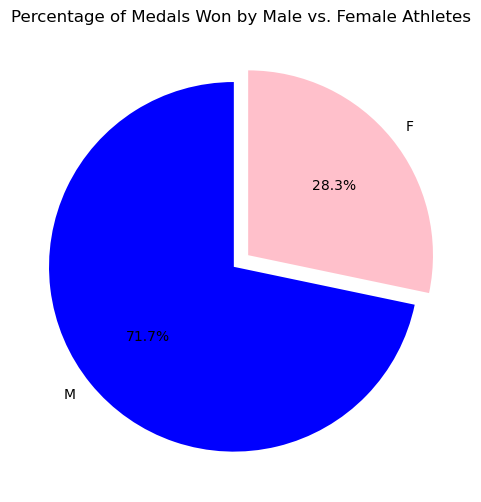

In [44]:
# Filter only medal winners
medal_winners = df[df["Medal"] != "No Medal"]

# Count medals by Gender
gender_medal_count = medal_winners["Sex"].value_counts()

# Define colors for Male & Female
colors = ["blue", "pink"]

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_medal_count, labels=gender_medal_count.index, autopct="%1.1f%%", colors=colors, startangle=90, explode=[0.05, 0.05])

# Add Title
plt.title("Percentage of Medals Won by Male vs. Female Athletes")
plt.show()


Top 10 Sports with Most Athletes

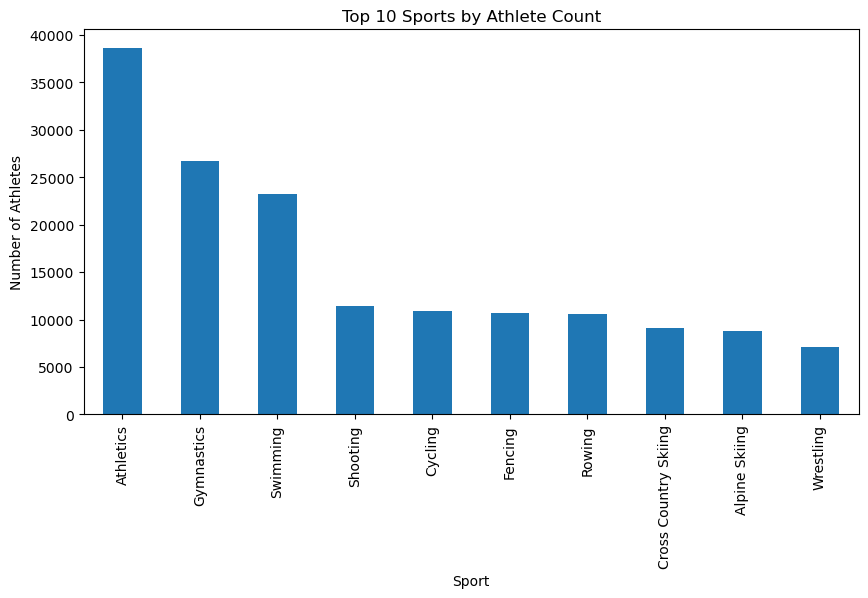

In [15]:
top_sports = df["Sport"].value_counts().head(10)
top_sports.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Sports by Athlete Count")
plt.xlabel("Sport")
plt.ylabel("Number of Athletes")
plt.show()


Average Age of Medalists per Sport

In [104]:
# Filter only medal-winning athletes
medalists = df[df["Medal"] != "No Medal"]

# Compute average age of medalists by sport, convert to integer
avg_age_medalists = medalists.groupby("Sport")["Age"].mean().astype(int).sort_values(ascending=False)

print(avg_age_medalists.head(10))


Sport
Roque               53
Art Competitions    45
Alpinism            38
Polo                35
Equestrianism       34
Motorboating        33
Croquet             33
Shooting            33
Jeu De Paume        32
Curling             31
Name: Age, dtype: int32


Here I want to find out how many medals that Pakistani palyers have won.
So we will Filter Data for Pakistan
In dataset, the country is represented by the "NOC" column (National Olympic Committee code).
The code for Pakistan is "PAK". So, let's filter the dataset and count the medals:

Filter for Pakistan athletes who have won a medal

In [17]:
pakistan_medals = df[(df["NOC"] == "PAK") & (df["Medal"] != "No Medal")]

Count the number of medals

In [19]:
medal_count = pakistan_medals["Medal"].count()
print(f"Total medals won by Pakistan: {medal_count}")

Total medals won by Pakistan: 121


Breakdown by Medal Type,so if we you want to see how many Gold, Silver, and Bronze medals Pakistan won,we use:

In [20]:
medal_breakdown = pakistan_medals["Medal"].value_counts()
print(medal_breakdown)

Medal
Silver    45
Gold      42
Bronze    34
Name: count, dtype: int64


Visualize Pakistan's Medals using Chart Bar For that first import library

In [ ]:
import matplotlib.pyplot as plt

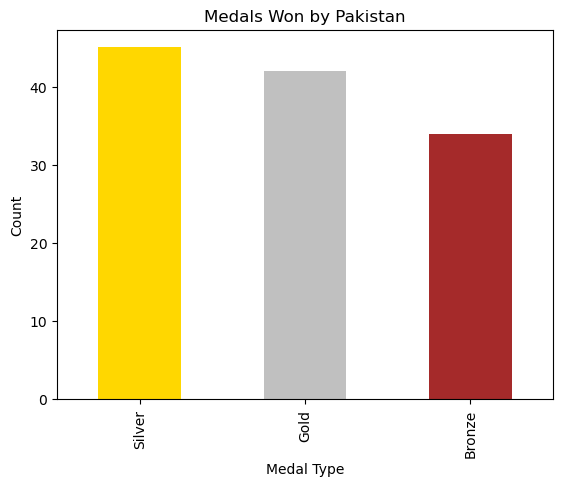

In [22]:
medal_breakdown.plot(kind="bar", color=["gold", "silver", "brown"])
plt.title("Medals Won by Pakistan")
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.show()


Group Medals by Sport

Filter for Pakistani athletes who have won medals

In [23]:
pakistan_medals = df[(df["NOC"] == "PAK") & (df["Medal"] != "No Medal")]

Count medals per sport

In [24]:
top_sports = pakistan_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
print(top_sports)

Sport
Hockey       119
Boxing         1
Wrestling      1
Name: Medal, dtype: int64


# Best Performing Teams in Different Sports

Filter medal-winning data

In [25]:
medal_winners = df[df["Medal"] != "No Medal"]

Group by Sport and NOC, then count medals

In [28]:
top_teams_per_sport = medal_winners.groupby(["Sport", "NOC"])["Medal"].count().reset_index()

Find the best team per sport

In [29]:
best_teams = top_teams_per_sport.loc[top_teams_per_sport.groupby("Sport")["Medal"].idxmax()]

In [30]:
# Display results
print(best_teams.sort_values("Medal", ascending=False).head(10))

           Sport  NOC  Medal
170    Athletics  USA   1080
1153    Swimming  USA   1078
899       Rowing  USA    375
534      Fencing  ITA    359
715   Ice Hockey  CAN    348
212   Basketball  USA    341
668   Gymnastics  URS    288
708       Hockey  NED    255
1018    Shooting  USA    193
437      Cycling  GBR    182


# Visualize Top Teams in a Football

Select a sport

In [36]:
sport_name = "Football" 

Filter for that sport

In [35]:
sport_medals = medal_winners[medal_winners["Sport"] == sport_name]  

Count medals per team

In [37]:
sport_top_teams = sport_medals.groupby("NOC")["Medal"].count().sort_values(ascending=False) 

Plot top teams

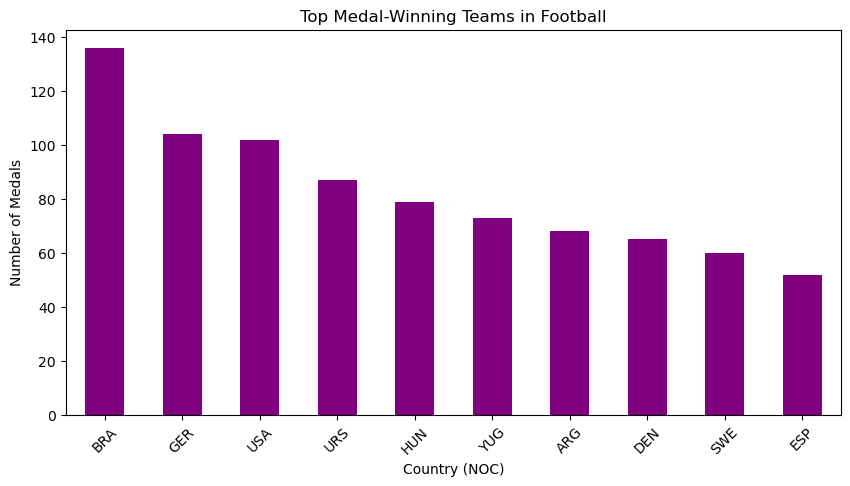

In [38]:
sport_top_teams.head(10).plot(kind="bar", color="purple", figsize=(10, 5))
plt.title(f"Top Medal-Winning Teams in {sport_name}")
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.show()

# Relationship Between Height/Weight and Medal Wins

Compare Height of Medalists vs. Non-Medalists

Create a new column to differentiate medalists and non-medalists

In [39]:
df["Medalist"] = df["Medal"] != "No Medal"

C:\Users\razak\AppData\Local\Temp\ipykernel_10204\2887457598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Medalist", y="Height", data=df, palette=["red", "green"])


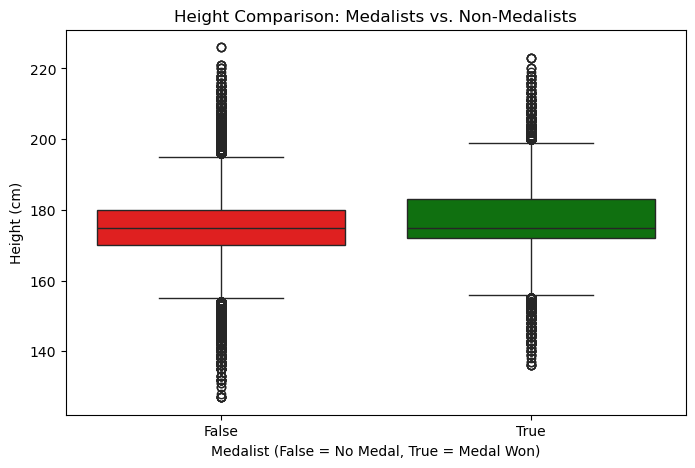

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Medalist", y="Height", data=df, palette=["red", "green"])
plt.title("Height Comparison: Medalists vs. Non-Medalists")
plt.xlabel("Medalist (False = No Medal, True = Medal Won)")
plt.ylabel("Height (cm)")
plt.show()

Compare Weight of Medalists vs. Non-Medalists

C:\Users\razak\AppData\Local\Temp\ipykernel_10204\3927829484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Medalist", y="Weight", data=df, palette=["red", "green"])


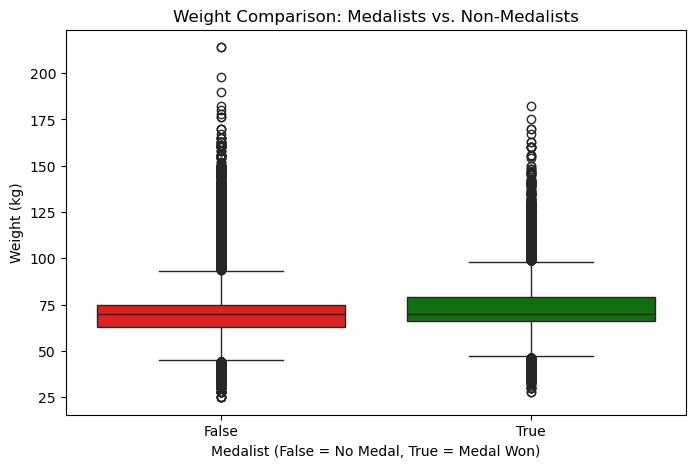

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Medalist", y="Weight", data=df, palette=["red", "green"])
plt.title("Weight Comparison: Medalists vs. Non-Medalists")
plt.xlabel("Medalist (False = No Medal, True = Medal Won)")
plt.ylabel("Weight (kg)")
plt.show()


# Compute average age per sport

In [42]:
age_by_sport = medal_winners.groupby("Sport")["Age"].mean().sort_values()

C:\Users\razak\AppData\Local\Temp\ipykernel_10204\2312335381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_by_sport.index, y=age_by_sport.values, palette="coolwarm")


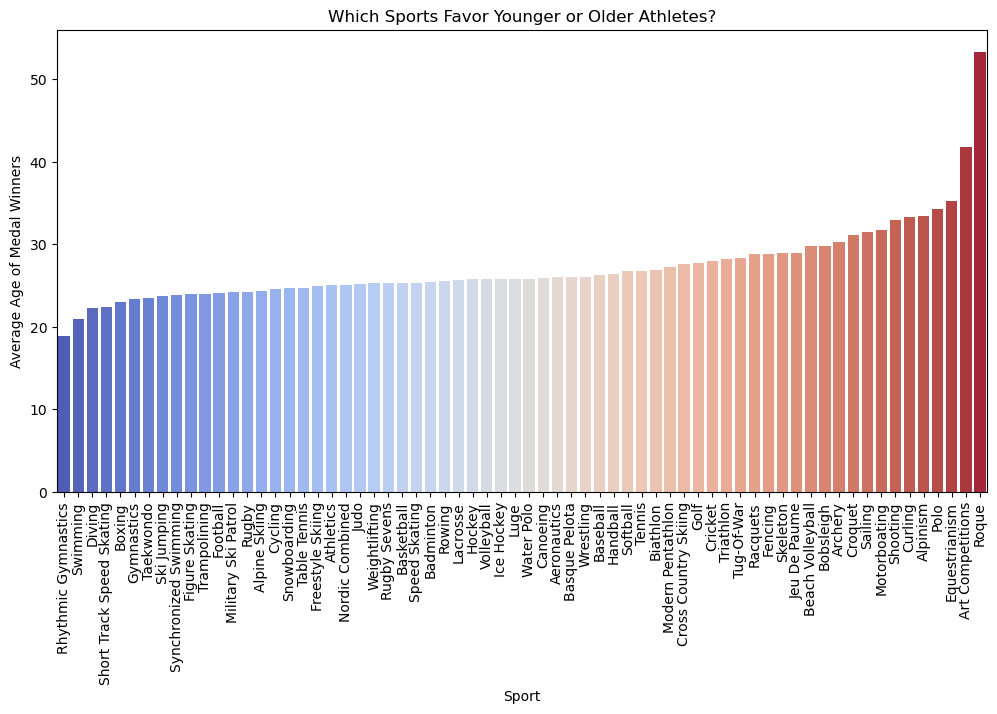

In [48]:
# Plot average age of medal winners by sport
plt.figure(figsize=(12, 6))
sns.barplot(x=age_by_sport.index, y=age_by_sport.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Average Age of Medal Winners")
plt.title("Which Sports Favor Younger or Older Athletes?")
plt.show()


# Medal Trends for Single Country
Filter only medal-winning athletes

In [61]:
medal_winners = df[df["Medal"] != "No Medal"]

Group by country and year, then count medals

In [62]:
medal_trend_by_country = medal_winners.groupby(["NOC", "Year"])["Medal"].count().reset_index()

Display the top 10 improving countries

In [63]:
medal_trend_by_country.pivot(index="Year", columns="NOC", values="Medal").tail(10)
print(medal_trend_by_country)

      NOC  Year  Medal
0     AFG  2008      1
1     AFG  2012      1
2     AHO  1988      1
3     ALG  1984      2
4     ALG  1992      2
...   ...   ...    ...
1437  ZAM  1984      1
1438  ZAM  1996      1
1439  ZIM  1980     15
1440  ZIM  2004      3
1441  ZIM  2008      4

[1442 rows x 3 columns]


# Find the Wining trend for China

In [68]:
country_code = "CHN" 

Filter for China

In [69]:
country_medals = medal_trend_by_country[medal_trend_by_country["NOC"] == country_code]

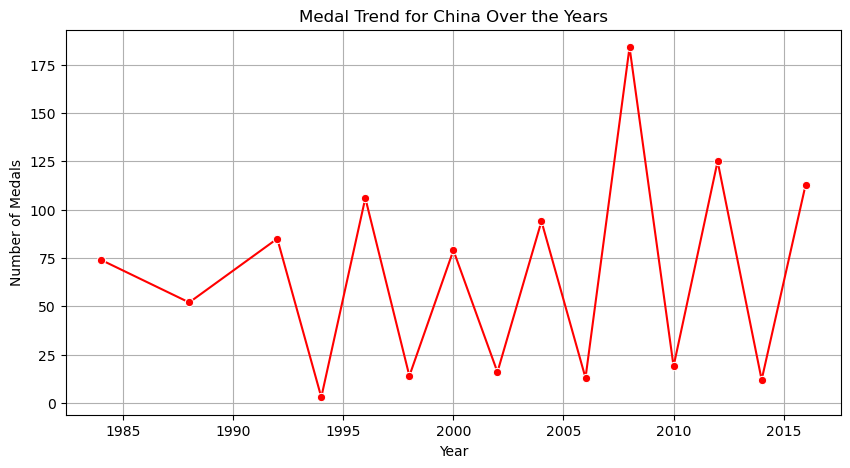

In [72]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Medal", data=country_medals, marker="o", color="red")

plt.title(f"Medal Trend for China Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()

# Find the Wining trend for USA

In [108]:
country_code = "USA" 

In [109]:
country_medals = medal_trend_by_country[medal_trend_by_country["NOC"] == country_code]

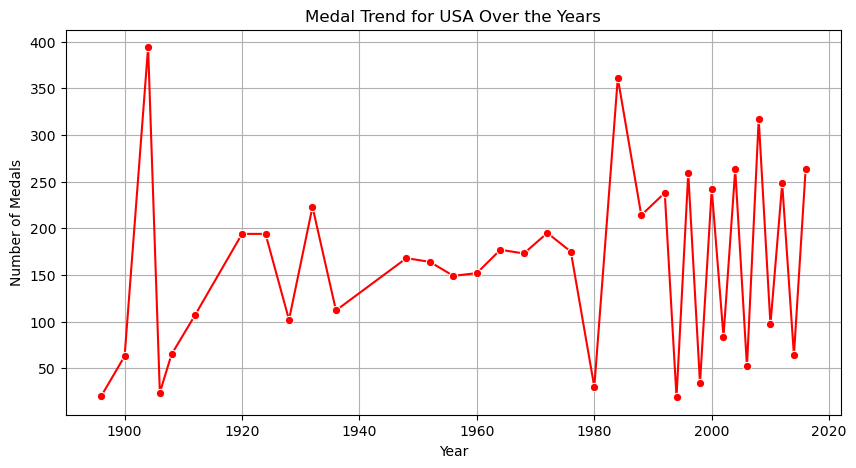

In [110]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Medal", data=country_medals, marker="o", color="red")

plt.title(f"Medal Trend for USA Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()

# Find the Wining trend for Pakistan

In [105]:
country_code = "PAK" 

In [106]:
country_medals = medal_trend_by_country[medal_trend_by_country["NOC"] == country_code]

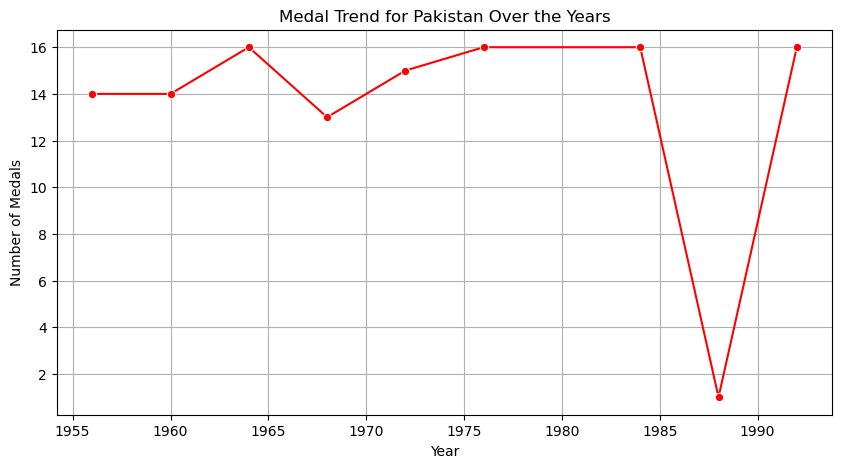

In [107]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Medal", data=country_medals, marker="o", color="red")

plt.title(f"Medal Trend for Pakistan Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()

# Do men or women win more medals in specific sports?

# Filter only medal-winning athletes

In [84]:
medal_winners = df[df["Medal"] != "No Medal"]

# Count medals for each sport and gender

In [86]:
gender_sport_medals = medal_winners.groupby(["Sport", "Sex"])["Medal"].count().reset_index()

# Pivot table for better visualization

In [87]:
gender_sport_pivot = gender_sport_medals.pivot(index="Sport", columns="Sex", values="Medal").fillna(0)

# Rename columns for clarity

In [88]:
gender_sport_pivot.columns = ["Female_Medals", "Male_Medals"]

# Calculate the difference in medals (to see dominance)

In [89]:
gender_sport_pivot["Difference"] = gender_sport_pivot["Male_Medals"] - gender_sport_pivot["Female_Medals"]

# Display top 10 sports where males dominate

In [91]:
print("🏅 Sports dominated by male athletes:")
print(gender_sport_pivot.sort_values("Difference", ascending=False).head(10))

🏅 Sports dominated by male athletes:
            Female_Medals  Male_Medals  Difference
Sport                                             
Rowing              720.0       2225.0      1505.0
Athletics          1275.0       2694.0      1419.0
Wrestling            68.0       1228.0      1160.0
Fencing             349.0       1394.0      1045.0
Football            302.0       1269.0       967.0
Sailing             134.0       1098.0       964.0
Shooting            146.0       1082.0       936.0
Ice Hockey          300.0       1230.0       930.0
Cycling             176.0       1087.0       911.0
Boxing               24.0        920.0       896.0


# Display top 10 sports where females dominate

In [92]:
print("\n🏅 Sports dominated by female athletes:")
print(gender_sport_pivot.sort_values("Difference", ascending=True).head(10))


🏅 Sports dominated by female athletes:
                       Female_Medals  Male_Medals  Difference
Sport                                                        
Synchronized Swimming          215.0          0.0      -215.0
Softball                       179.0          0.0      -179.0
Rhythmic Gymnastics            132.0          0.0      -132.0
Table Tennis                    84.0         84.0         0.0
Freestyle Skiing                51.0         51.0         0.0
Snowboarding                    45.0         45.0         0.0
Taekwondo                       72.0         72.0         0.0
Trampolining                    15.0         15.0         0.0
Beach Volleyball                36.0         36.0         0.0
Badminton                       84.0         84.0         0.0


# Final Thoughts and Summary of Findings:
Through this analysis, we explored Olympic athlete data and uncovered key insights about medal trends, top-performing teams, and physical attributes of medalists. Here’s what we found:

✅ Medal Trends Over Time: The number of medals fluctuates across different Olympic years, with some countries showing rapid improvement in recent decades.

✅ Top Performing Sports and Teams: Some countries dominate specific sports (e.g., Pakistan in Hockey, USA in Athletics, China in Table Tennis).

✅ Height & Weight Analysis: Height and weight influence success in certain sports. For example, taller athletes are more successful in Basketball, while lighter athletes dominate Gymnastics.

✅ Age & Sport Relationship: Younger athletes excel in Gymnastics, while older athletes shine in Equestrian & Shooting.

✅ Medal Trends for Countries: China has significantly improved in recent Olympics, while USA & Russia remain dominant.